In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [52]:
def read_csv(filepath, **kwargs):
    """
    Wczytuje plik CSV do pandas.DataFrame.
    Przekaż dodatkowe argumenty do pd.read_csv przez kwargs (np. parse_dates, index_col).
    """
    return pd.read_csv(filepath, **kwargs)

def extract_csv(df, col1, col2):
    x = df[col1]
    y = df[col2]
    return x, y


def plot_single(df, x=None, y=None, kind='line', figsize=(8, 4), title=None, **plot_kwargs):
    """
    Rysuje pojedynczy wykres z DataFrame.
    - df: pandas.DataFrame
    - x: nazwa kolumny na osi x lub None
    - y: nazwa kolumny (lub lista kolumn) na osi y
    - kind: typ wykresu ('line','bar','hist', ...)
    - figsize: rozmiar wykresu
    - title: tytuł wykresu
    - plot_kwargs: dodatkowe argumenty przekazywane do df.plot(...)
    """
    fig, ax = plt.subplots(figsize=figsize)
    df.plot(x=x, y=y, kind=kind, ax=ax, **plot_kwargs)
    if title:
        ax.set_title(title)
    ax.grid(True)
    plt.tight_layout()
    plt.show()


def plot_double(x1,y1, x2,y2,main_title):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(main_title, fontsize=16)
    ax[0].plot(x1, y1*100.0)
    ax[0].grid(True)

    ax[0].set_title("Trening")
    ax[0].set_xlabel("Epoka")
    ax[0].set_ylabel("Wartość [%]")

    ax[1].plot(x2, y2*100.0)
    ax[1].grid(True)
    ax[1].set_title("Walidacja")
    ax[1].set_xlabel("Epoka")
    ax[1].set_ylabel("Wartość [%]")
    # ax[0].set_xlim(0,1)
    # ax[0].set_ylim(0,1)

    # ax[1].set_xlim(0,1)
    # ax[1].set_ylim(0,1)


    plt.tight_layout()
    plt.show()


def plot_one(x,y,typee, title, xtitle,ytitle):
    plt.figure(figsize=(8, 4))
    plt.plot(x,y, typee)
    plt.title(title)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_pr_trajectory(prec_df, rec_df, title="Trajektoria Precision-Recall"):
    """
    Rysuje trajektorię uczenia w przestrzeni Precision-Recall.
    Dodaje numery epok, aby pokazać upływ czasu.
    """
    merged = pd.merge(prec_df, rec_df, on="Step", suffixes=('_prec', '_rec'))
    
    precision = merged['Value_prec']
    recall = merged['Value_rec']
    steps = merged['Step']
    
    plt.figure(figsize=(8, 8))
    # Rysujemy ścieżkę zmian
    plt.plot(recall, precision, marker='o', linestyle='-', markersize=4, alpha=0.6, label='Ścieżka uczenia')
    
    if not merged.empty:
        # Start (zielony) i Koniec (czerwony)
        plt.scatter(recall.iloc[0], precision.iloc[0], c='green', s=100, label='Start', zorder=5)
        plt.scatter(recall.iloc[-1], precision.iloc[-1], c='red', s=100, label='Koniec', zorder=5)
        
        # Dodajemy numery epok co 10% danych, żeby nie zaciemnić obrazu
        step_interval = max(1, len(merged) // 10)
        for i in range(0, len(merged), step_interval): 
            plt.annotate(f"{int(steps.iloc[i])}", 
                         (recall.iloc[i], precision.iloc[i]),
                         textcoords="offset points", 
                         xytext=(5, -5), 
                         ha='left',
                         fontsize=9,
                         alpha=0.8)
    
    plt.title(title)
    plt.xlabel("Recall (Czułość)")
    plt.ylabel("Precision (Precyzja)")
    plt.xlim([0, 1.05])
    plt.ylim([0, 1.05])
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [15]:
conv_acc_train = read_csv("data/klas/convnext/acc/train.csv")
conv_acc_val = read_csv("data/klas/convnext/acc/val.csv")
conv_loss_train = read_csv("data/klas/convnext/loss/loss_train.csv")
conv_loss_val = read_csv("data/klas/convnext/loss/loss_val.csv")
conv_lr = read_csv("data/klas/convnext/lr/lr.csv")

conv_pre_train = read_csv("data/klas/convnext/precision/train.csv")
conv_pre_val = read_csv("data/klas/convnext/precision/val.csv")
conv_rec_train = read_csv("data/klas/convnext/recall/train.csv")
conv_rec_val = read_csv("data/klas/convnext/recall/val.csv")

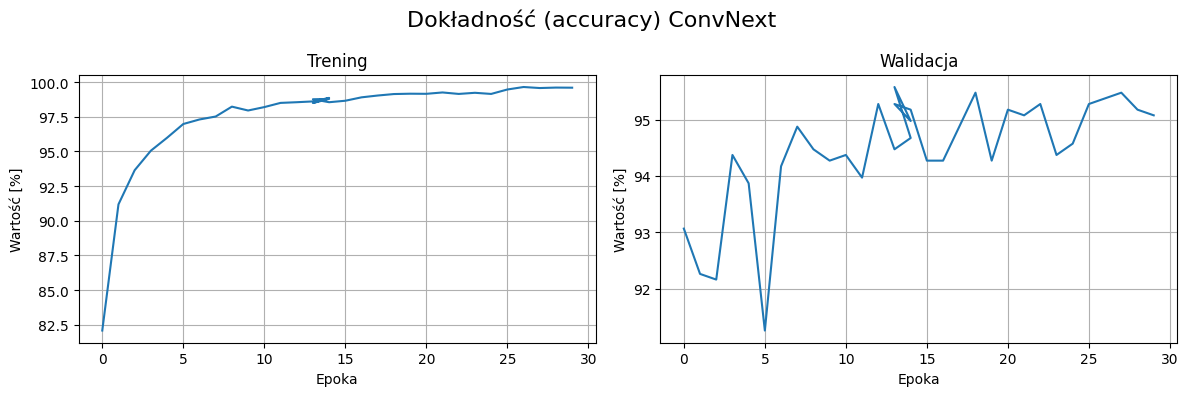

In [31]:
x1,y1 = extract_csv(conv_acc_train, "Step", "Value")
x2,y2 = extract_csv(conv_acc_val, "Step", "Value")
plot_double(x1,y1,x2,y2,"Dokładność (accuracy) ConvNext ")

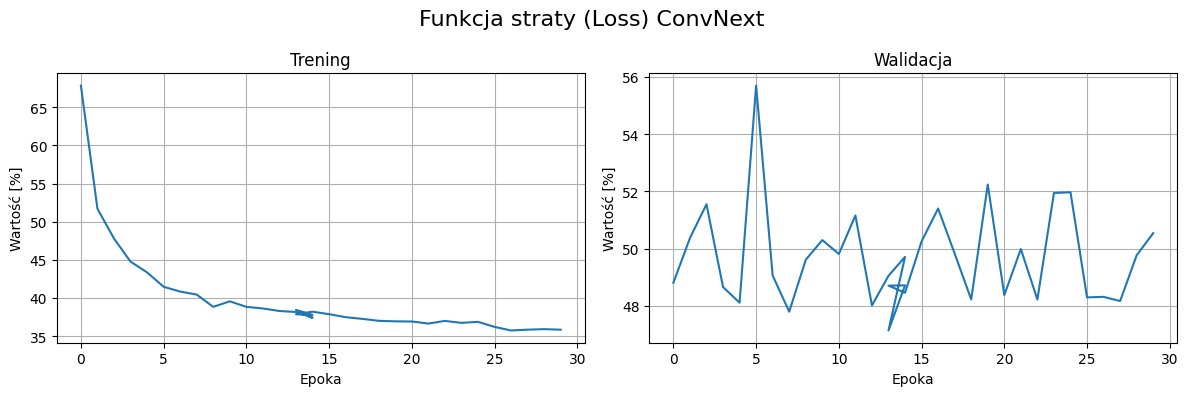

In [33]:
x1,y1 = extract_csv(conv_loss_train, "Step", "Value")
x2,y2 = extract_csv(conv_loss_val, "Step", "Value")
plot_double(x1,y1,x2,y2,"Funkcja straty (Loss) ConvNext ")

In [ ]:
x1,y1 = extract_csv(conv_loss_train, "Step", "Value")
x2,y2 = extract_csv(conv_loss_val, "Step", "Value")
plot_double(x1,y1,x2,y2,"Funkcja straty (Loss) ConvNext ")

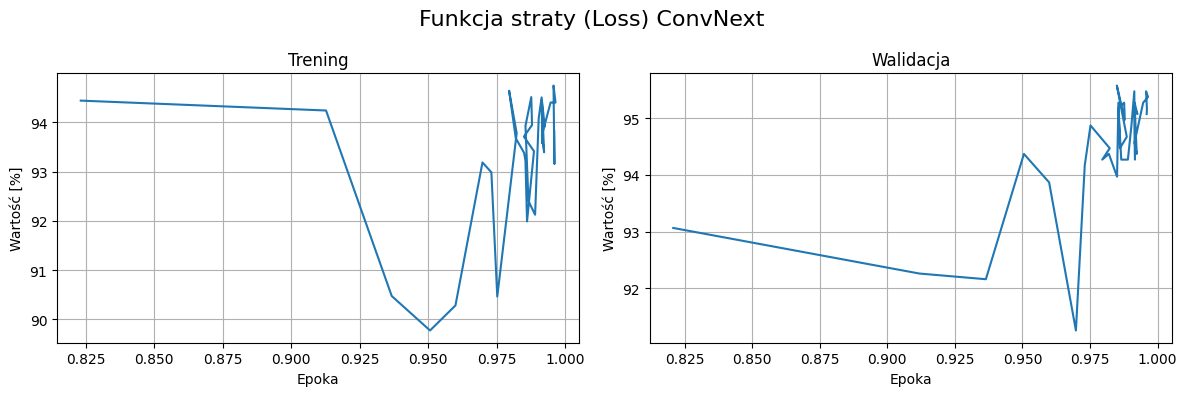

In [39]:
x1,y1 = extract_csv(conv_pre_train, "Step", "Value")
x2,y2 = extract_csv(conv_pre_val, "Step", "Value")

x3,y3 = extract_csv(conv_acc_train, "Step", "Value")
x4,y4 = extract_csv(conv_acc_val, "Step", "Value")


plot_double(y1,y2,y3,y4,"Funkcja straty (Loss) ConvNext ")



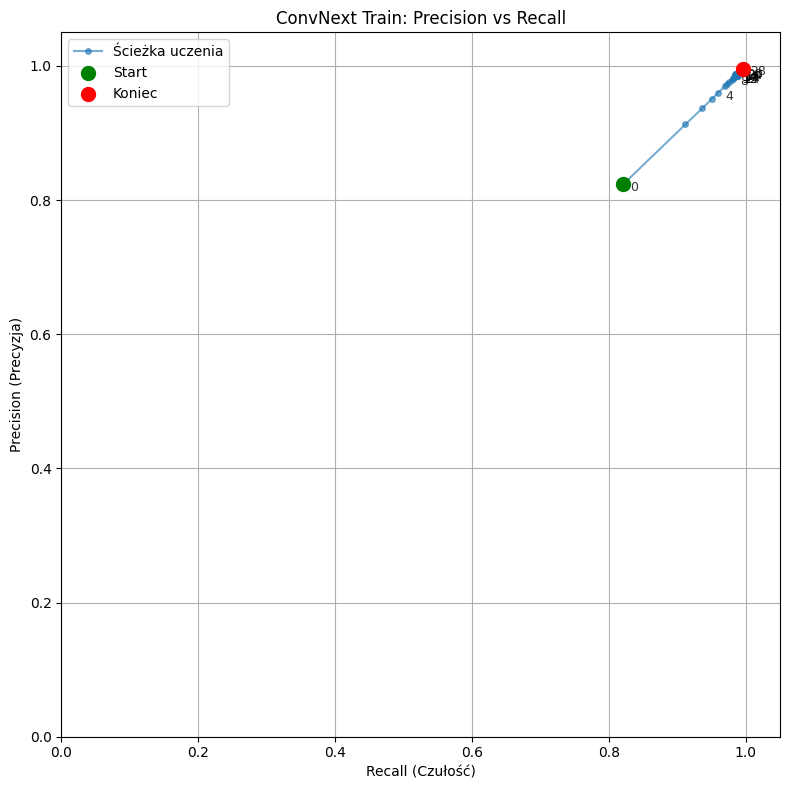

In [43]:
plot_pr_trajectory(conv_pre_train, conv_rec_train, title="ConvNext Train: Precision vs Recall")

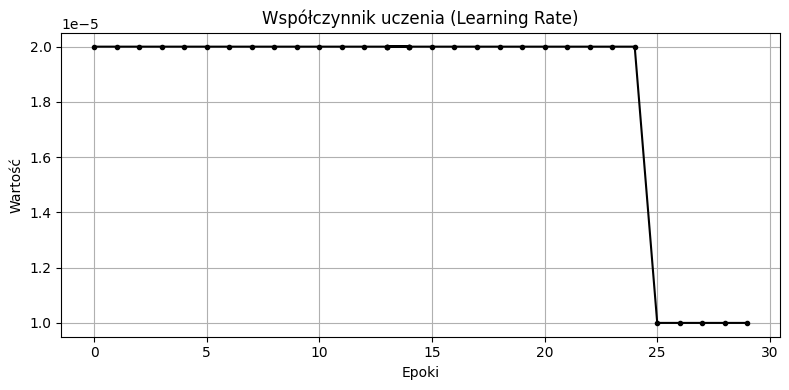

In [54]:
x,y = extract_csv(conv_lr, "Step", "Value")
plot_one(x,y,"k.-", "Współczynnik uczenia (Learning Rate)", "Epoki", "Wartość")

In [ ]:
x,y = extract_csv(conv_lr, "Step", "Value")
plot_one(x,y,"k.-", "Współczynnik uczenia (Learning Rate)", "Epoki", "Wartość")

In [ ]:
x,y = extract_csv(conv_lr, "Step", "Value")
plot_one(x,y,"k.-", "Współczynnik uczenia (Learning Rate)", "Epoki", "Wartość")

In [57]:
ef_acc_train = read_csv("data/klas/effic/acc/train.csv")
ef_acc_val = read_csv("data/klas/effic/acc/val.csv")
ef_loss_train = read_csv("data/klas/effic/loss/train.csv")
ef_loss_val = read_csv("data/klas/effic/loss/val.csv")
ef_lr = read_csv("data/klas/effic/lr/lr.csv")

ef_pre_train = read_csv("data/klas/effic/prec/train.csv")
ef_pre_val = read_csv("data/klas/effic/prec/val.csv")
ef_rec_train = read_csv("data/klas/effic/recall/train.csv")
ef_rec_val = read_csv("data/klas/effic/recall/val.csv")

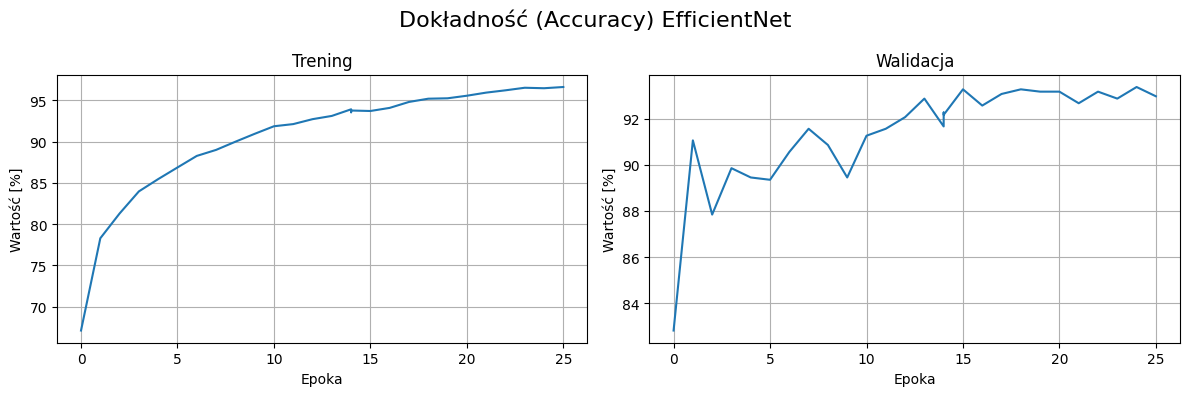

In [58]:
x1,y1 = extract_csv(ef_acc_train, "Step", "Value")
x2,y2 = extract_csv(ef_acc_val, "Step", "Value")
plot_double(x1,y1,x2,y2,"Dokładność (Accuracy) EfficientNet")

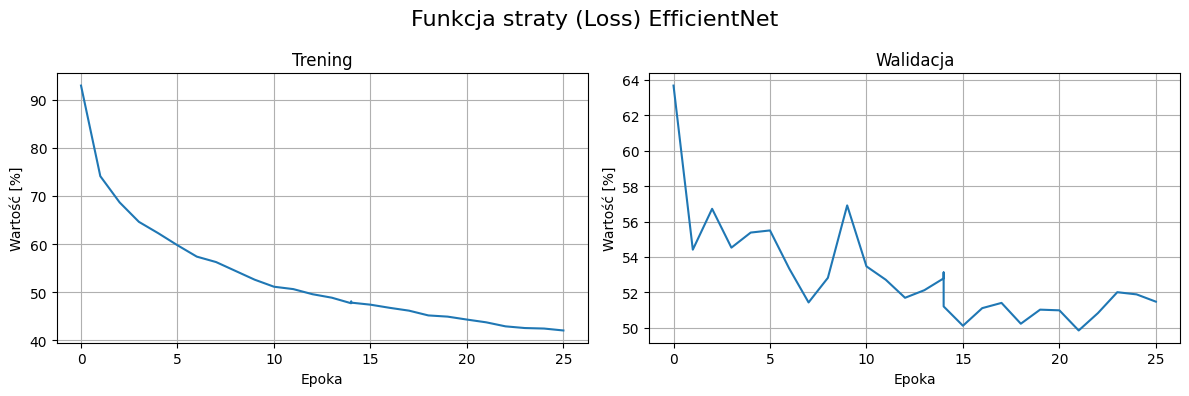

In [59]:
x1,y1 = extract_csv(ef_loss_train, "Step", "Value")
x2,y2 = extract_csv(ef_loss_val, "Step", "Value")
plot_double(x1,y1,x2,y2,"Funkcja straty (Loss) EfficientNet")